# Machine Learning project - classification
## Problem statement :
The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (target variable).

In [55]:
# install libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning Libraries :
from sklearn.preprocessing import LabelEncoder # For encoding categorical data
from imblearn.over_sampling import SMOTE # balencing the samples in data
from sklearn.preprocessing import StandardScaler,MinMaxScaler # Standeerdizing data (scaling )

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV # Splitting data # Cross validation of model # Finding best parametrs  
from sklearn.metrics import accuracy_score,classification_report # Report of the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Base model for boosting classifier
from sklearn import tree # to plot the tree
from sklearn.ensemble import RandomForestClassifier # random Forest classifier
from sklearn.naive_bayes import GaussianNB # naive bayes Classifier
from sklearn import neighbors # KNN Classifier 
from sklearn.ensemble import AdaBoostClassifier # Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


## Setting Default values :
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.max_colwidth=None
plt.style.use('seaborn-darkgrid')
palette=sns.color_palette('husl',10)
plt.rcParams['figure.figsize']=(20,8)
plt.rcParams['font.size']=15

## Read the file 

In [2]:
# Read the dataset from local drive
bank = pd.read_csv(r"D:\new Data science class\project\7. svm\Predicting Term Deposit Subscription by a client\Dataset\bank-additional-full.csv",delimiter= ';')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data fields:

**Input variables:**

* age -- Age of the client
* job -- Type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* marital -- Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education -- (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')
* default -- has credit in default? (categorical: 'no','yes','unknown')
* housing -- has a housing loan? (categorical: 'no','yes','unknown')
* loan -- has a personal loan? (categorical: 'no','yes','unknown')
* contact -- contact communication type (categorical: 'cellular','telephone')
* month -- last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week -- last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* duration -- last contact duration, in seconds
* campaign -- number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays -- number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous -- number of contacts performed before this campaign and for this client
* poutcome -- outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* emp.var.rate -- employment variation rate - quarterly indicator (numeric) cons.price.idx consumer price index - monthly indicator cons.conf.idx consumer confidence index - monthly indicator
* euribor3m -- euribor 3 month rate - daily indicator nr.employed number of employees - quarterly indicator
* y(target variable)-- has the client subscribed a term deposit? (binary: 'yes','no')

## EDA

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* There are no missing values. Hence no imputation required

### Splitting columns into numeric and factoral

In [6]:
# split into numeric and factoral columns 
nc = bank.select_dtypes(exclude = 'object').columns
fc = bank.select_dtypes(include = 'object').columns
nc,fc

(Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
       dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome', 'y'],
       dtype='object'))

### Multicolinearity check 

<AxesSubplot:>

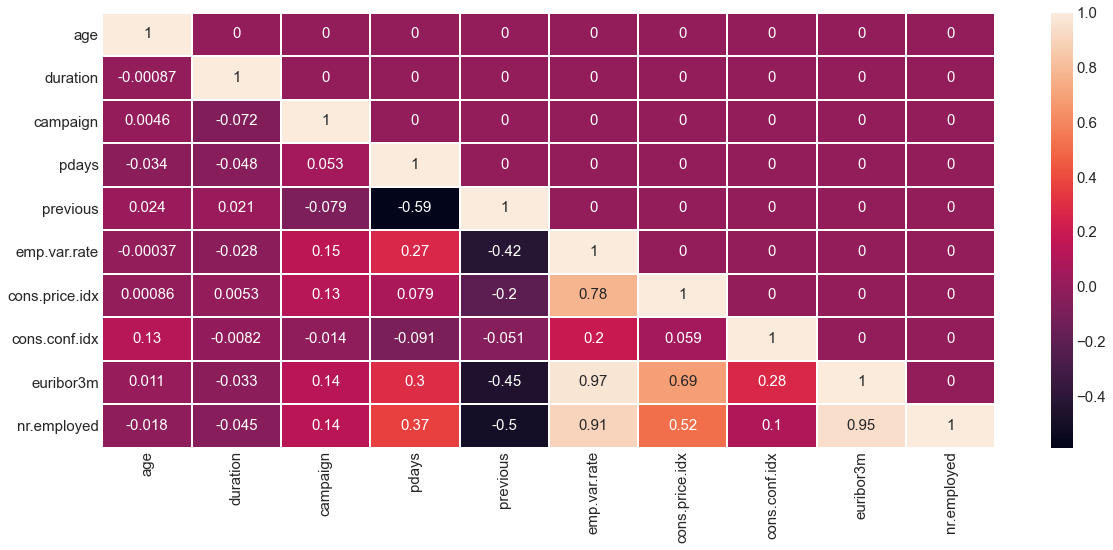

In [7]:
# check for multicolinaerity 
cor = np.tril(bank[nc].corr())


sns.heatmap(cor, annot= True,xticklabels= nc, yticklabels = nc, linewidths = 1 )

* We can see that euribor3m and emp.var.rate are highly carrelated 

## Bivariate analysis 

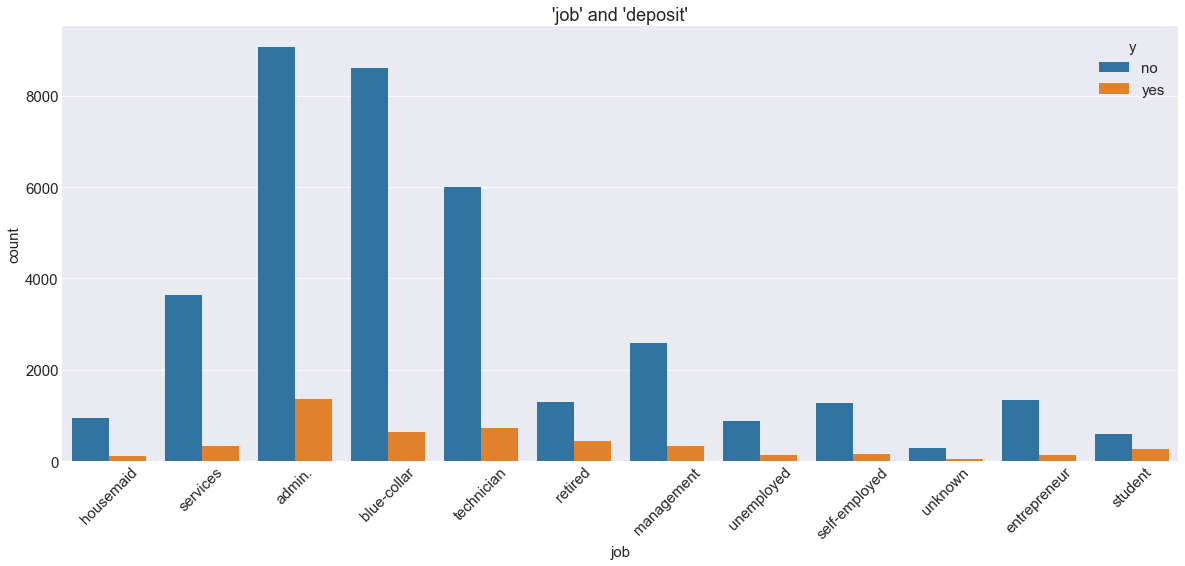

job     admin.  blue-collar  entrepreneur  housemaid  management    retired  \
y                                                                             
no   87.027442    93.105684     91.483516       90.0    88.78249  74.767442   
yes  12.972558     6.894316      8.516484       10.0    11.21751  25.232558   

job  self-employed  services    student  technician  unemployed    unknown  
y                                                                           
no       89.514426  91.86193  68.571429   89.173958   85.798817  88.787879  
yes      10.485574   8.13807  31.428571   10.826042   14.201183  11.212121  
--------


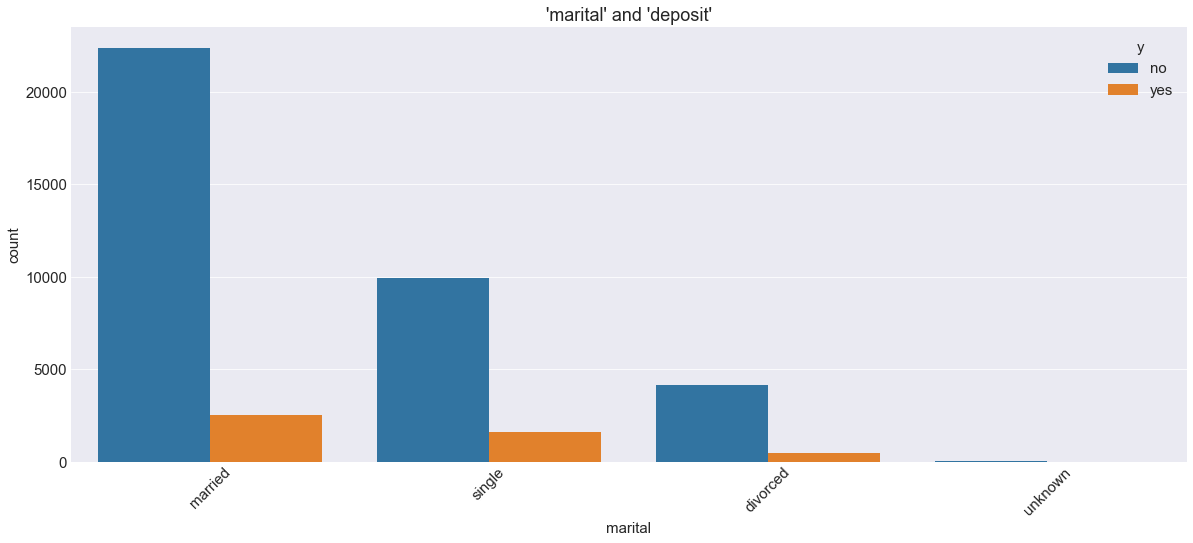

marital   divorced    married     single  unknown
y                                                
no       89.679098  89.842747  85.995851     85.0
yes      10.320902  10.157253  14.004149     15.0
--------


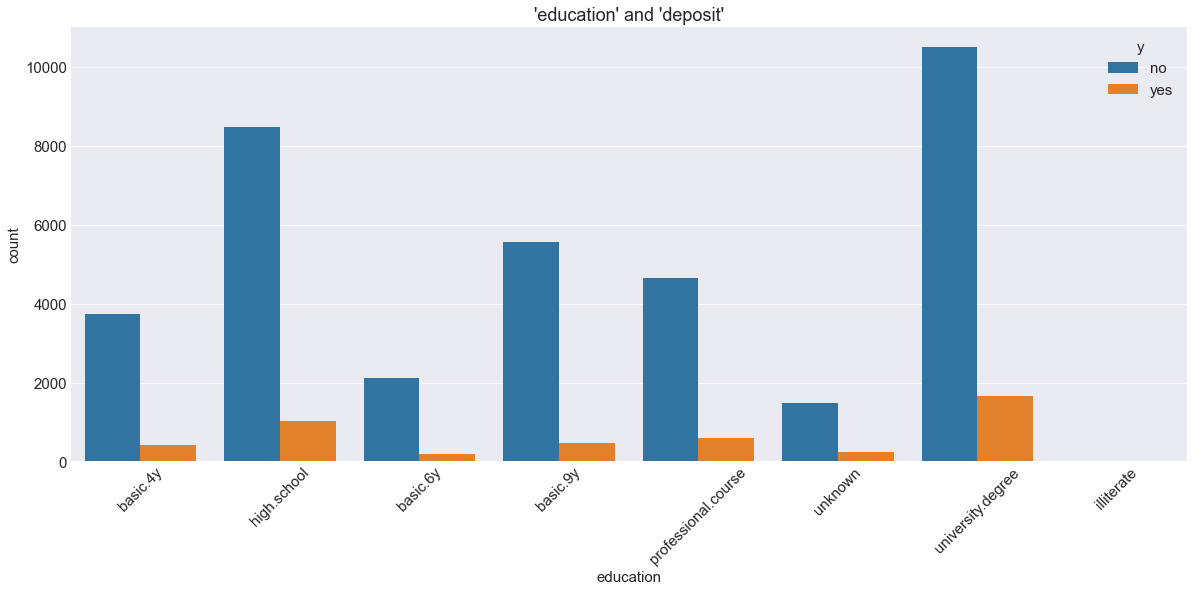

education   basic.4y   basic.6y   basic.9y  high.school  illiterate  \
y                                                                     
no         89.750958  91.797557  92.175352    89.164477   77.777778   
yes        10.249042   8.202443   7.824648    10.835523   22.222222   

education  professional.course  university.degree    unknown  
y                                                             
no                   88.651535          86.275477  85.499711  
yes                  11.348465          13.724523  14.500289  
--------


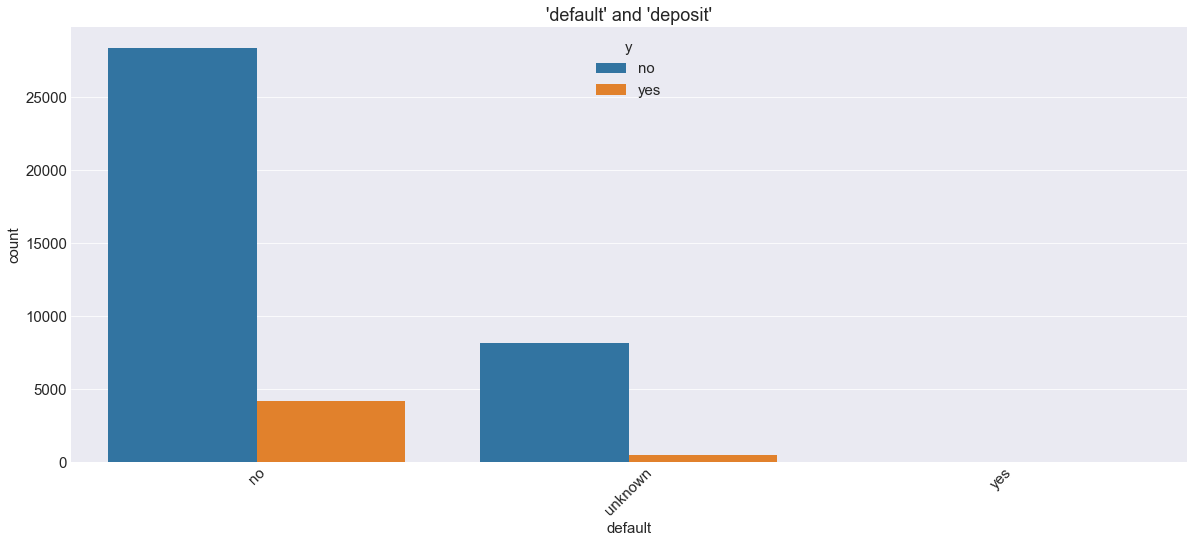

default         no   unknown    yes
y                                  
no       87.121026  94.84704  100.0
yes      12.878974   5.15296    0.0
--------


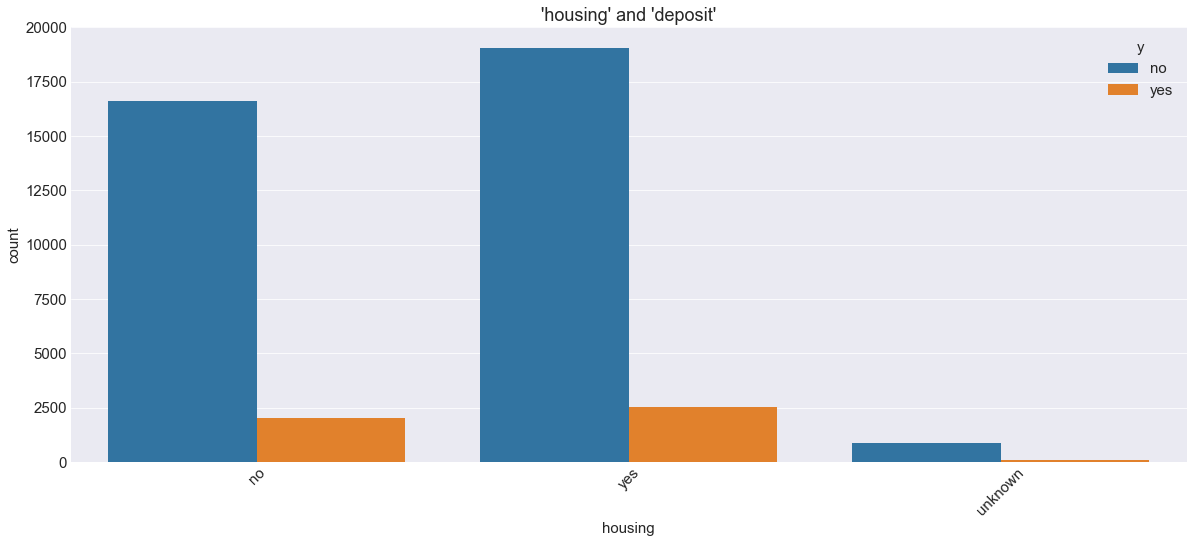

housing         no    unknown        yes
y                                       
no       89.120395  89.191919  88.380608
yes      10.879605  10.808081  11.619392
--------


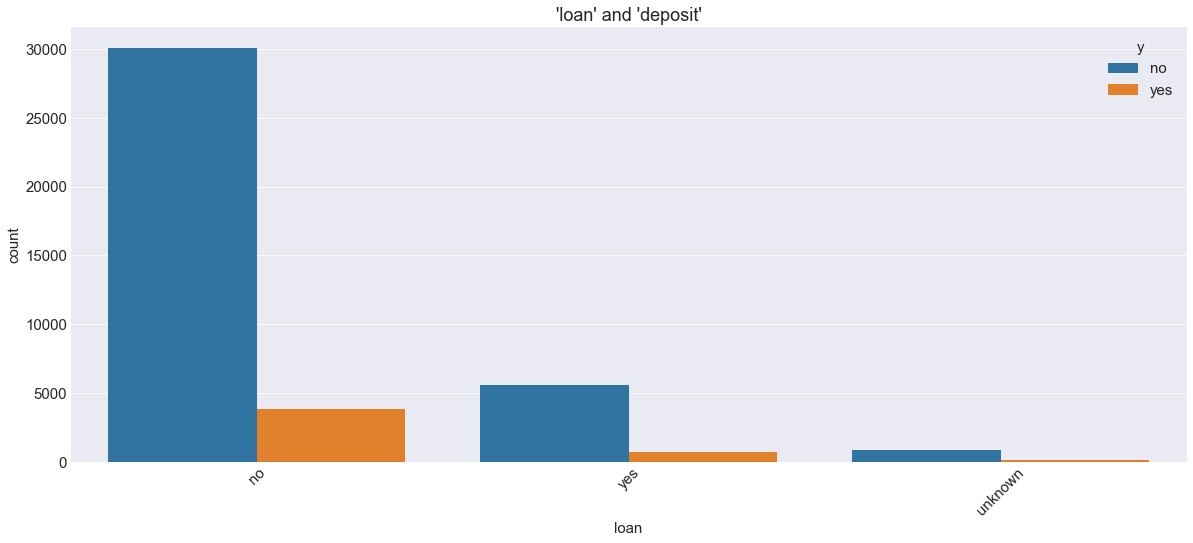

loan         no    unknown        yes
y                                    
no    88.659794  89.191919  89.068502
yes   11.340206  10.808081  10.931498
--------


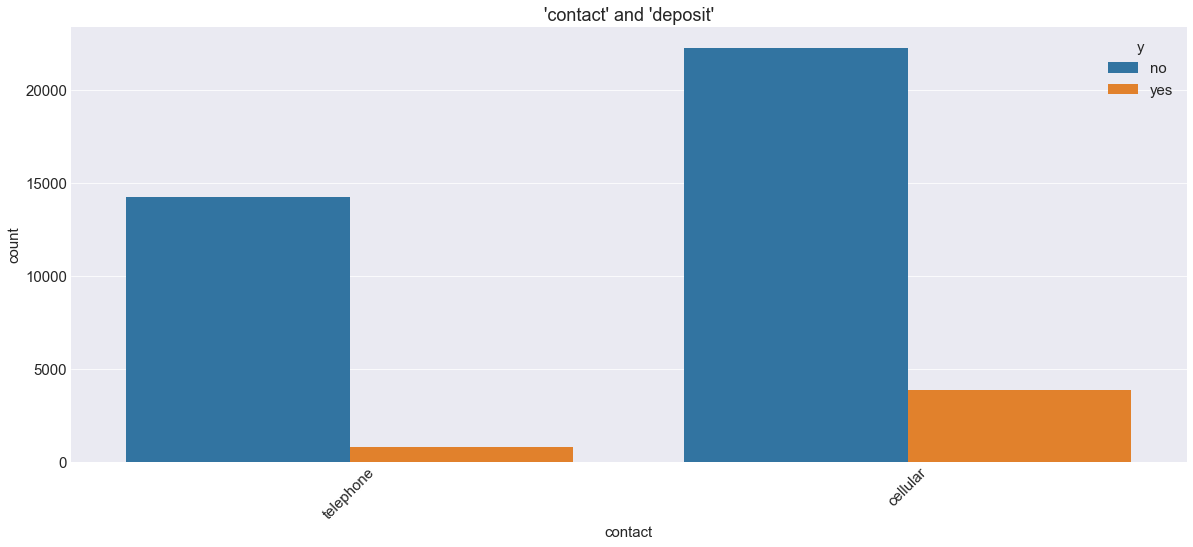

contact   cellular  telephone
y                            
no       85.262393  94.768679
yes      14.737607   5.231321
--------


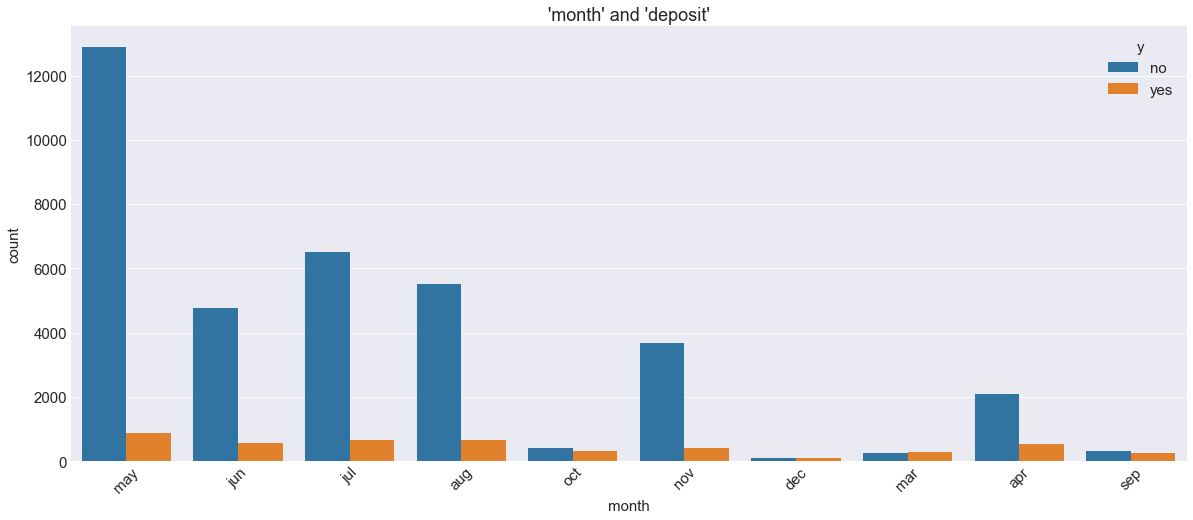

month        apr        aug        dec        jul       jun        mar  \
y                                                                        
no     79.521277  89.397863  51.098901  90.953443  89.48853  49.450549   
yes    20.478723  10.602137  48.901099   9.046557  10.51147  50.549451   

month        may        nov        oct        sep  
y                                                  
no     93.565255  89.856133  56.128134  55.087719  
yes     6.434745  10.143867  43.871866  44.912281  
--------


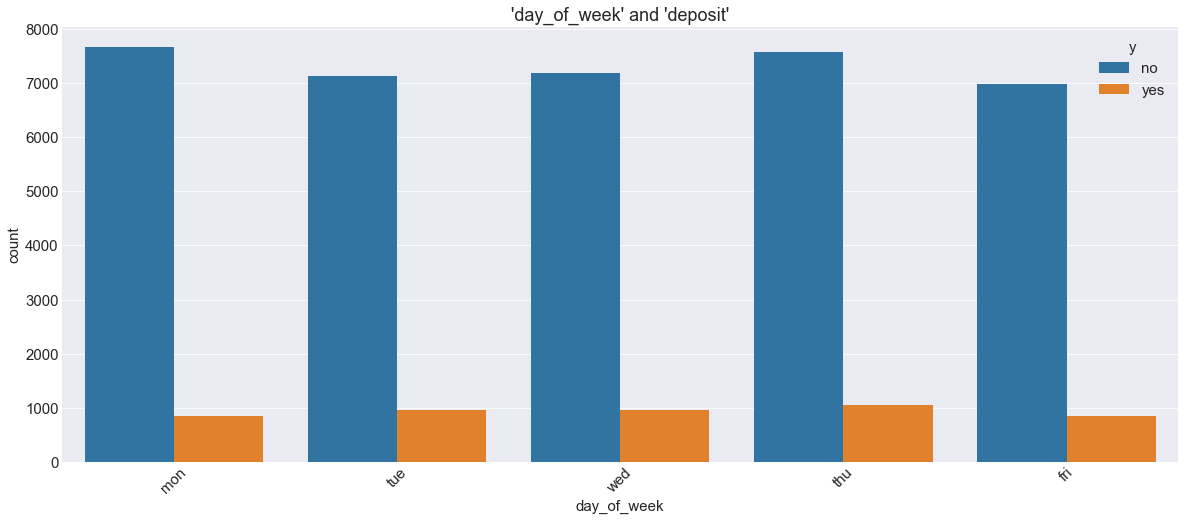

day_of_week        fri       mon        thu        tue        wed
y                                                                
no           89.191261  90.05168  87.881248  88.220025  88.332924
yes          10.808739   9.94832  12.118752  11.779975  11.667076
--------


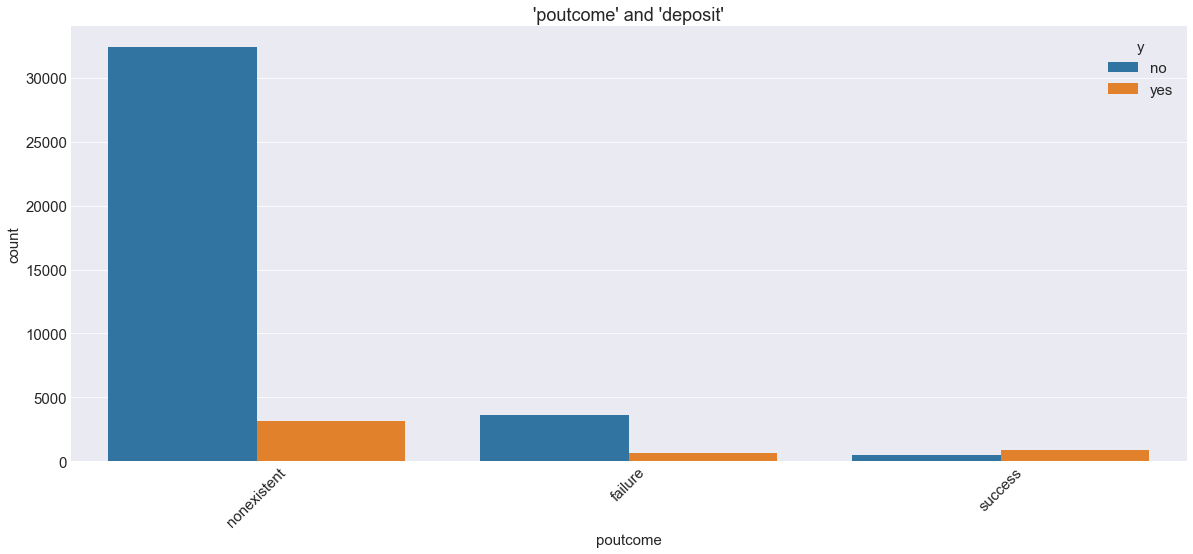

poutcome    failure  nonexistent    success
y                                          
no        85.771402    91.167787  34.887109
yes       14.228598     8.832213  65.112891
--------


In [8]:
for c in fc:
    if (c != 'y'):
        variable = sns.countplot(x=bank[c], data = bank, hue = "y")
        variable.tick_params(axis='x', rotation=45)
        plt.title("'{}' and 'deposit'".format(c))
        plt.show()
        
        cross = pd.crosstab(bank["y"],bank[c]).apply(lambda x: x/x.sum() * 100)
        print(cross)
        print("--------")

### Summary

* 1.Job feature:
    * People working in Management, Blue-Collars and Technicians received the most offers from the marketing department to suscribe term deposits.
    * Students, unemployed, entrepreneurs and housemaids received the less amount of offers from the marketing department.
    * Retired, students and unemployed were more willing to subscribe term deposits
* 2.Marital feature:
    * The bank was interested more on married people and single than divorced.
* 3.Education: 
    * Highest subscribers for term deposit were people with university degree
* 4.Default:
    * The person who default are not offered and do not subscribe to term deposit 
* 5.Housing:
    * Having a house or not does not affect the term deposit subription
* 6.Loan:
    * People not having loan are more likely to subscribe to term deposit 
* 7.Contact:
    * People contacted on cellular are more likely to subscribe to term deposit
* 8.Month of contact:
    * May seems to have higher term deposits 
    * But people contacted during oct- dec- march- sep have higher ratio of subscribing to term deposit
* 9.Day of week:
    * Day of week contacted does not seem to have any effect on subscription of term deposit
* 10.Previous outcome
    * As name suggest the previous campaign make a good impact on the subsciption.
    

### Numerical feature analysis

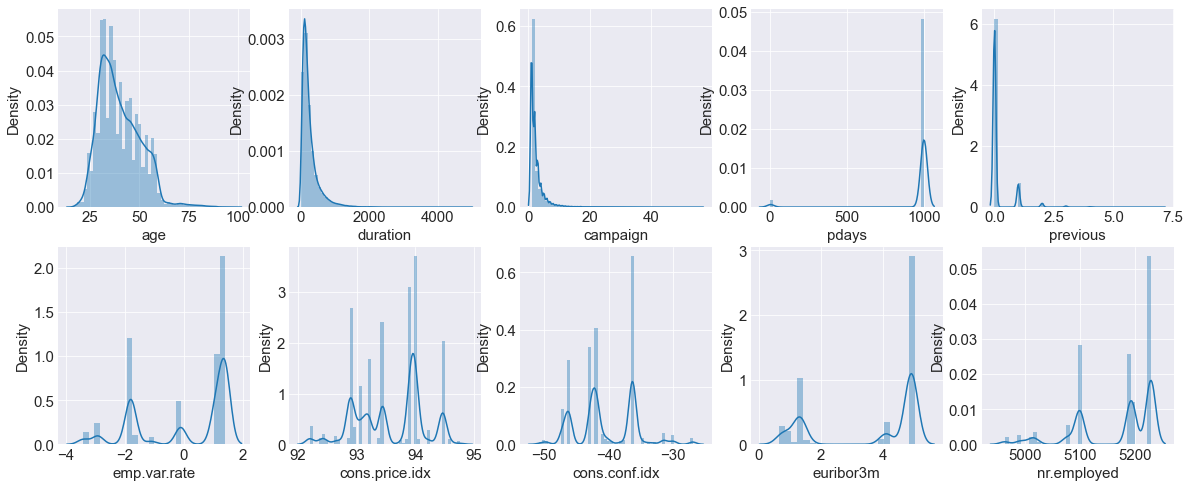

In [9]:
# Analysis Of numerical Data :
rows=2
cols=5
pos=1
for c in nc:
    plt.subplot(rows,cols,pos)
    sns.distplot(bank[c])
    pos+=1

* Numerical data analysis shows the data is not normally distributed.
* Transformation of data required before model building.

### Checking for singularity 

In [10]:
for col in bank.columns:
    n = len(bank[col].unique())
    print("The no of unique values in {} are {}".format(col,n))

The no of unique values in age are 78
The no of unique values in job are 12
The no of unique values in marital are 4
The no of unique values in education are 8
The no of unique values in default are 3
The no of unique values in housing are 3
The no of unique values in loan are 3
The no of unique values in contact are 2
The no of unique values in month are 10
The no of unique values in day_of_week are 5
The no of unique values in duration are 1544
The no of unique values in campaign are 42
The no of unique values in pdays are 27
The no of unique values in previous are 8
The no of unique values in poutcome are 3
The no of unique values in emp.var.rate are 10
The no of unique values in cons.price.idx are 26
The no of unique values in cons.conf.idx are 26
The no of unique values in euribor3m are 316
The no of unique values in nr.employed are 11
The no of unique values in y are 2


### Categorical Encoding 

In [11]:
fc

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [12]:
# Label encoding in ordianal Categorical Data:

# Here Education can be considerd an ordinal variable. we can use label encoder in it:
# as label Encoder uses alphabetical order to create rank, here illitrate and unknown gets higher rank than others :
# Replacing it with other value can make meaningfull labels.
bank.education[bank.education=='illiterate']='a_illiterate'
bank.education[bank.education=='unknown']='b_unknown'

In [13]:
# Now we can use label encoder on the education feature :
encoder=LabelEncoder()
bank.education=encoder.fit_transform(bank.education)

# also target variable required to be converted to classes : as NO : 0 , YES=1
bank.y=encoder.fit_transform(bank.y)

In [14]:
# Other categorical Data needs to be converted into one hot encoding:
data=pd.get_dummies(bank)
data.head()

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,5,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,5,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,3,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,5,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


### Data Sampling and Target Variable Analysis

In [15]:
# Defining Dependant and Independant Variables :
X=data.drop('y',axis=1)
y=data.y

Text(0.5, 1.0, 'Distribution of Target variable')

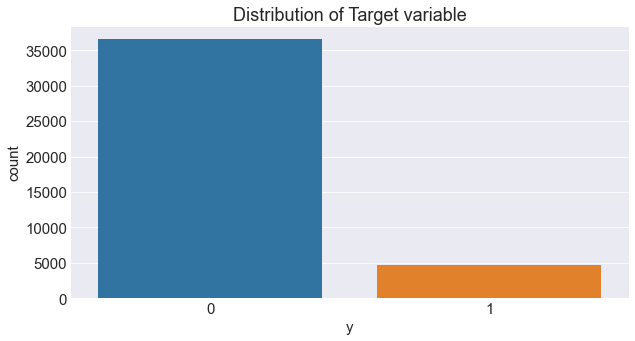

In [16]:
# Checking distribution of target variable:
plt.figure(figsize=(10,5))
ax=sns.countplot(data.y)
plt.title('Distribution of Target variable')

* Data is highly biased .
* Data sampling required .

In [17]:
# Sampling data :
sampling=SMOTE()
sampled_X,sampled_y=sampling.fit_resample(X,y)

Text(0.5, 1.0, 'Distribution of sampled Target variable')

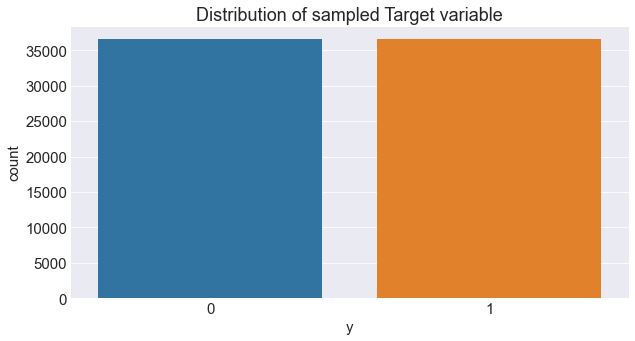

In [18]:
plt.figure(figsize=(10,5))
ax=sns.countplot(sampled_y)
plt.title('Distribution of sampled Target variable')

### Data Scaling

In [22]:
# Data scaling can be done using MinMaxScaler or StandardScaler
# In this case the data is not normally distributed hence we will use MinMaxScaler

minmax=MinMaxScaler()

train_mm=sampled_X.copy()
train_mm.iloc[:,:]=minmax.fit_transform(sampled_X.iloc[:,:])
test=sampled_y

### Train test spilt

In [23]:
trainx,testx,trainy,testy=train_test_split(train_mm,test,test_size=0.30)

In [24]:
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(51167, 56)
(51167,)
(21929, 56)
(21929,)


### Model building 

In [25]:
# function for confusion matrix and classification report 
def cm(actual,predicted):
    # confusion matrix 
    df = pd.DataFrame({'actual':actual,'predicted':predicted})
    print(pd.crosstab(df.actual,df.predicted))
    
    print('\n')
    
    # classification report
    print(classification_report(actual,predicted))

#### Model1 - Logistic regression 

In [26]:
# model building
model1 = LogisticRegression()
model1.fit(trainx,trainy)

LogisticRegression()

In [27]:
# Predictions 
pred1 = model1.predict(testx)

In [28]:
# confusion matrix and classification report 
cm(testy,pred1)

predicted      0      1
actual                 
0          10663    259
1            863  10144


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10922
           1       0.98      0.92      0.95     11007

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



In [29]:
Logistic_accuracy=accuracy_score(testy,pred1)
print('Overall Accuracy Of Logistic Model : {:.2f}%'.format(Logistic_accuracy))

Overall Accuracy Of Logistic Model : 0.95%


#### Model 2 - Decision tree 

In [30]:
# model building
model2 = DecisionTreeClassifier()
model2.fit(trainx,trainy)

# Predictions 
pred2 = model2.predict(testx)

# confusion matrix and classification report 
cm(testy,pred2)

predicted      0      1
actual                 
0          10203    719
1            700  10307


              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10922
           1       0.93      0.94      0.94     11007

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



In [31]:
DecisonTree_accuracy=accuracy_score(testy,pred2)
print('Overall Accuracy Of Decision Tree Model : {:.2f}%'.format(DecisonTree_accuracy))

Overall Accuracy Of Decision Tree Model : 0.94%


In [35]:
# checking feature importance
temp = pd.DataFrame(model2.feature_importances_,trainx.columns, columns= ['importance'])
temp.sort_values('importance', ascending = False )

,importance
duration,0.393907
nr.employed,0.141218
cons.conf.idx,0.084484
contact_telephone,0.076701
euribor3m,0.039514
age,0.025233
cons.price.idx,0.017127
day_of_week_mon,0.015914
contact_cellular,0.014216
day_of_week_thu,0.014004


#### Model 3 -  Random forest 

In [36]:
# model building
model3 = RandomForestClassifier()
model3.fit(trainx,trainy)

# Predictions 
pred3 = model3.predict(testx)

# confusion matrix and classification report 
cm(testy,pred3)

predicted      0      1
actual                 
0          10472    450
1            576  10431


              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10922
           1       0.96      0.95      0.95     11007

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



In [41]:
RandomForest_accuracy=accuracy_score(testy,pred3)
print('Overall Accuracy Of Random Forest Model : {:.2f}%'.format(RandomForest_accuracy))

Overall Accuracy Of Random Forest Model : 0.95%


#### Model 4 - Naive Bayes 

In [39]:
# model building
model4 = GaussianNB()
model4.fit(trainx,trainy)

# Predictions 
pred4 = model4.predict(testx)

# confusion matrix and classification report 
cm(testy,pred4)

predicted     0      1
actual                
0          8356   2566
1           772  10235


              precision    recall  f1-score   support

           0       0.92      0.77      0.83     10922
           1       0.80      0.93      0.86     11007

    accuracy                           0.85     21929
   macro avg       0.86      0.85      0.85     21929
weighted avg       0.86      0.85      0.85     21929



In [42]:
NaiveBayes_accuracy=accuracy_score(testy,pred4)
print('Overall Accuracy Of Naive bayes Model : {:.2f}%'.format(NaiveBayes_accuracy))

Overall Accuracy Of Naive bayes Model : 0.85%


#### Model 5 - KNN 

In [44]:
# K nearest neighbours needs to find the value for K to create a model.
# K can be found with cross validation of different values of K between 3 to 12 .
# cross validation to determine best K
cv_accuracy=[]

n_list=np.arange(3,12,2)

for n in n_list:
    model=neighbors.KNeighborsClassifier(n_neighbors=n)
    scores=cross_val_score(model,trainx,trainy,cv=10,scoring='accuracy')
    cv_accuracy.append(scores.mean())

In [45]:
# Accuracy of Each K in The range.
cv_accuracy

[0.9372839053253171,
 0.9366975326232462,
 0.9355053476560906,
 0.9351927064623693,
 0.9343327474088351]

* nearly all the values of K has accuracy at 90%.
* Choosing the best K will be good for model creation.

In [46]:
best_k=n_list[cv_accuracy.index(max(cv_accuracy))]
print('best K :',best_k)

best K : 3


Text(0.5, 1.0, 'Accuracy Vs Neighbors')

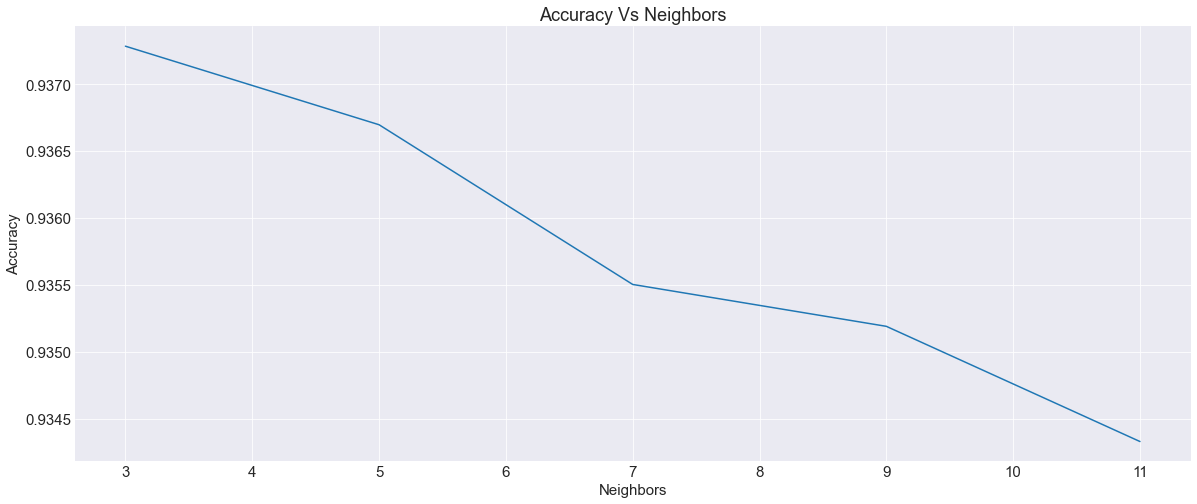

In [47]:
# plot of accuracy vs neighbors 
plt.plot(n_list,cv_accuracy)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Neighbors')

* From the plot , it's clear that as the K value goes increasing the accuracy is decreasing . Hence the best K will be 3.

In [48]:
# Build the model using best K
model5=neighbors.KNeighborsClassifier(n_neighbors=best_k)
model5.fit(trainx,trainy)

# Predictions 
pred5 = model5.predict(testx)

# confusion matrix and classification report 
cm(testy,pred5)

predicted      0      1
actual                 
0          10405    517
1            866  10141


              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10922
           1       0.95      0.92      0.94     11007

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



In [49]:
KNN_accuracy=accuracy_score(testy,pred5)
print('Overall Accuracy Of KNN Model : {:.2f}%'.format(KNN_accuracy))

Overall Accuracy Of KNN Model : 0.94%


#### Model 6 -  Adabbost classifier 

In [57]:
# Building model 
model6 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=50,learning_rate= 1)
model6.fit(trainx,trainy)

# Predictions 
pred6 = model6.predict(testx)

# confusion matrix and classification report 
cm(testy,pred6)


predicted      0      1
actual                 
0          10437    485
1            814  10193


              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10922
           1       0.95      0.93      0.94     11007

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



In [58]:
AdaBoostDT_accuracy=accuracy_score(testy,pred5)
print('Overall Accuracy Of AdaBoost with DT as base Model : {:.2f}%'.format(AdaBoostDT_accuracy))

Overall Accuracy Of AdaBoost with DT as base Model : 0.94%


#### Model 7 - Adaboost with random forest as base model 

In [59]:
# Building model 
model7 = AdaBoostClassifier(RandomForestClassifier(max_depth=1),n_estimators=50,learning_rate= 1)
model7.fit(trainx,trainy)

# Predictions 
pred7 = model7.predict(testx)

# confusion matrix and classification report 
cm(testy,pred7)

predicted      0      1
actual                 
0          10393    529
1            710  10297


              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10922
           1       0.95      0.94      0.94     11007

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



In [61]:
AdaBoostRF_accuracy=accuracy_score(testy,pred7)
print('Overall Accuracy Of AdaBoost with RF as base Model : {:.2f}%'.format(AdaBoostRF_accuracy))

Overall Accuracy Of AdaBoost with RF as base Model : 0.94%


#### Model 8 - GradientBoostingClassifier

In [62]:
# Building model 
model8 = GradientBoostingClassifier()
model8.fit(trainx,trainy)

# Predictions 
pred8 = model8.predict(testx)

# confusion matrix and classification report 
cm(testy,pred8)

predicted      0      1
actual                 
0          10311    611
1            546  10461


              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10922
           1       0.94      0.95      0.95     11007

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



In [63]:
GradientBoost_accuracy=accuracy_score(testy,pred8)
print('Overall Accuracy Of Gradient Boosting as base Model : {:.2f}%'.format(GradientBoost_accuracy))

Overall Accuracy Of Gradient Boosting as base Model : 0.95%


#### Model 9 - XGB Classifier

In [64]:
# Building model 
model9 = XGBClassifier()
model9.fit(trainx,trainy)

# Predictions 
pred9 = model9.predict(testx)

# confusion matrix and classification report 
cm(testy,pred9)

[22:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
predicted      0      1
actual                 
0          10469    453
1            585  10422


              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10922
           1       0.96      0.95      0.95     11007

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



In [65]:
XGB_accuracy=accuracy_score(testy,pred9)
print('Overall Accuracy Of XGB Model : {:.2f}%'.format(XGB_accuracy))

Overall Accuracy Of XGB Model : 0.95%


### Results

In [69]:
accuracy=(Logistic_accuracy,DecisonTree_accuracy,RandomForest_accuracy,NaiveBayes_accuracy,KNN_accuracy,AdaBoostDT_accuracy,AdaBoostRF_accuracy,GradientBoost_accuracy,XGB_accuracy)
models=('Logistic','Decision Tree','RandomForest','Naive bayes','KNN','Adaboost(DT)','Adaboost(RF)','GradientBoost','XGB')
Results=pd.DataFrame({'Models':models,'Accuracy':accuracy})
Results

,Models,Accuracy
0,Logistic,0.948835
1,Decision Tree,0.935291
2,RandomForest,0.953213
3,Naive bayes,0.847781
4,KNN,0.936933
5,Adaboost(DT),0.936933
6,Adaboost(RF),0.943499
7,GradientBoost,0.947239
8,XGB,0.952665


### Conclusion
* Almost all the models have an accuracy of 93-95%
* Random Forest and XGB have highest accuracy